# Linear regression in diabetes dataset

Let's explore the datasets that are included in this Python library. These datasets have been cleaned and formatted for use in ML algorithms.

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

First, we will load the diabetes dataset. Do this in the cell below by importing the datasets and then loading the dataset  to the `diabetes` variable using the `load_diabetes()` function ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html)).

In [38]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes(as_frame=True)


In [17]:
x = pd.DataFrame(diabetes.data)



In [6]:
y = pd.DataFrame(diabetes.target)

Let's explore this variable by looking at the different attributes (keys) of `diabetes`. Note that the `load_diabetes` function does not return dataframes. It returns you a Python dictionary.

#### The next step is to read the description of the dataset. 

Print the description in the cell below using the `DESCR` attribute of the `diabetes` variable. Read the data description carefully to fully understand what each column represents.

*Hint: If your output is ill-formatted by displaying linebreaks as `\n`, it means you are not using the `print` function.*

In [21]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

#### Based on the data description, answer the following questions:

1. How many attributes are there in the data? What do they mean?

1. What is the relation between `diabetes['data']` and `diabetes['target']`?

1. How many records are there in the data?

**Respuestas**
1. Tiene 11 atributos. :Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level


<Axes: >

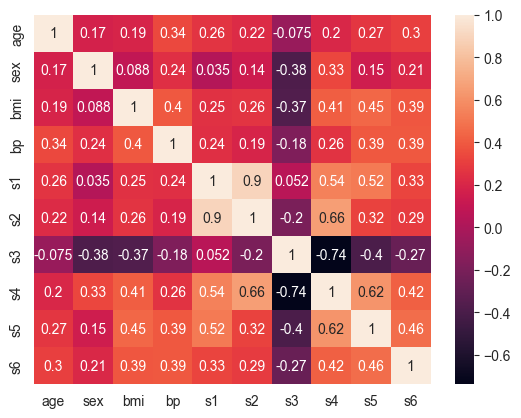

In [ ]:
# 2
sns.heatmap(x.corr(numeric_only=True), annot=True)


In [29]:
print(x.shape)
print(y.shape)

(442, 10)
(442, 1)


#### Now explore what are contained in the *data* portion as well as the *target* portion of `diabetes`. 

Scikit-learn typically takes in 2D numpy arrays as input (though pandas dataframes are also accepted). Inspect the shape of `data` and `target`. Confirm they are consistent with the data description.

## Building a regression model

The data have already been split to predictor (*data*) and response (*target*) variables. Given this information, we'll apply what we have previously learned about linear regression and apply the algorithm to the diabetes dataset.

#### In the cell below, import the `linear_model` class from `sklearn`. 

#### Create a new instance of the linear regression model and assign the new instance to the variable `diabetes_model`.

In [41]:
from sklearn.linear_model import LinearRegression
diabetes_model = LinearRegression()

diabetes_model

LinearRegression()

#### Next, let's split the training and test data.

Define `diabetes_data_train`, `diabetes_target_train`, `diabetes_data_test`, and `diabetes_target_test`. Use the last 20 records for the test data and the rest for the training data.

In [47]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 20, shuffle= False)

Perform a brief exploratory analysis to investigate the conditions necessary for linear regression. This analysis will help you understand the distribution of the target variable and its correlations with other features.

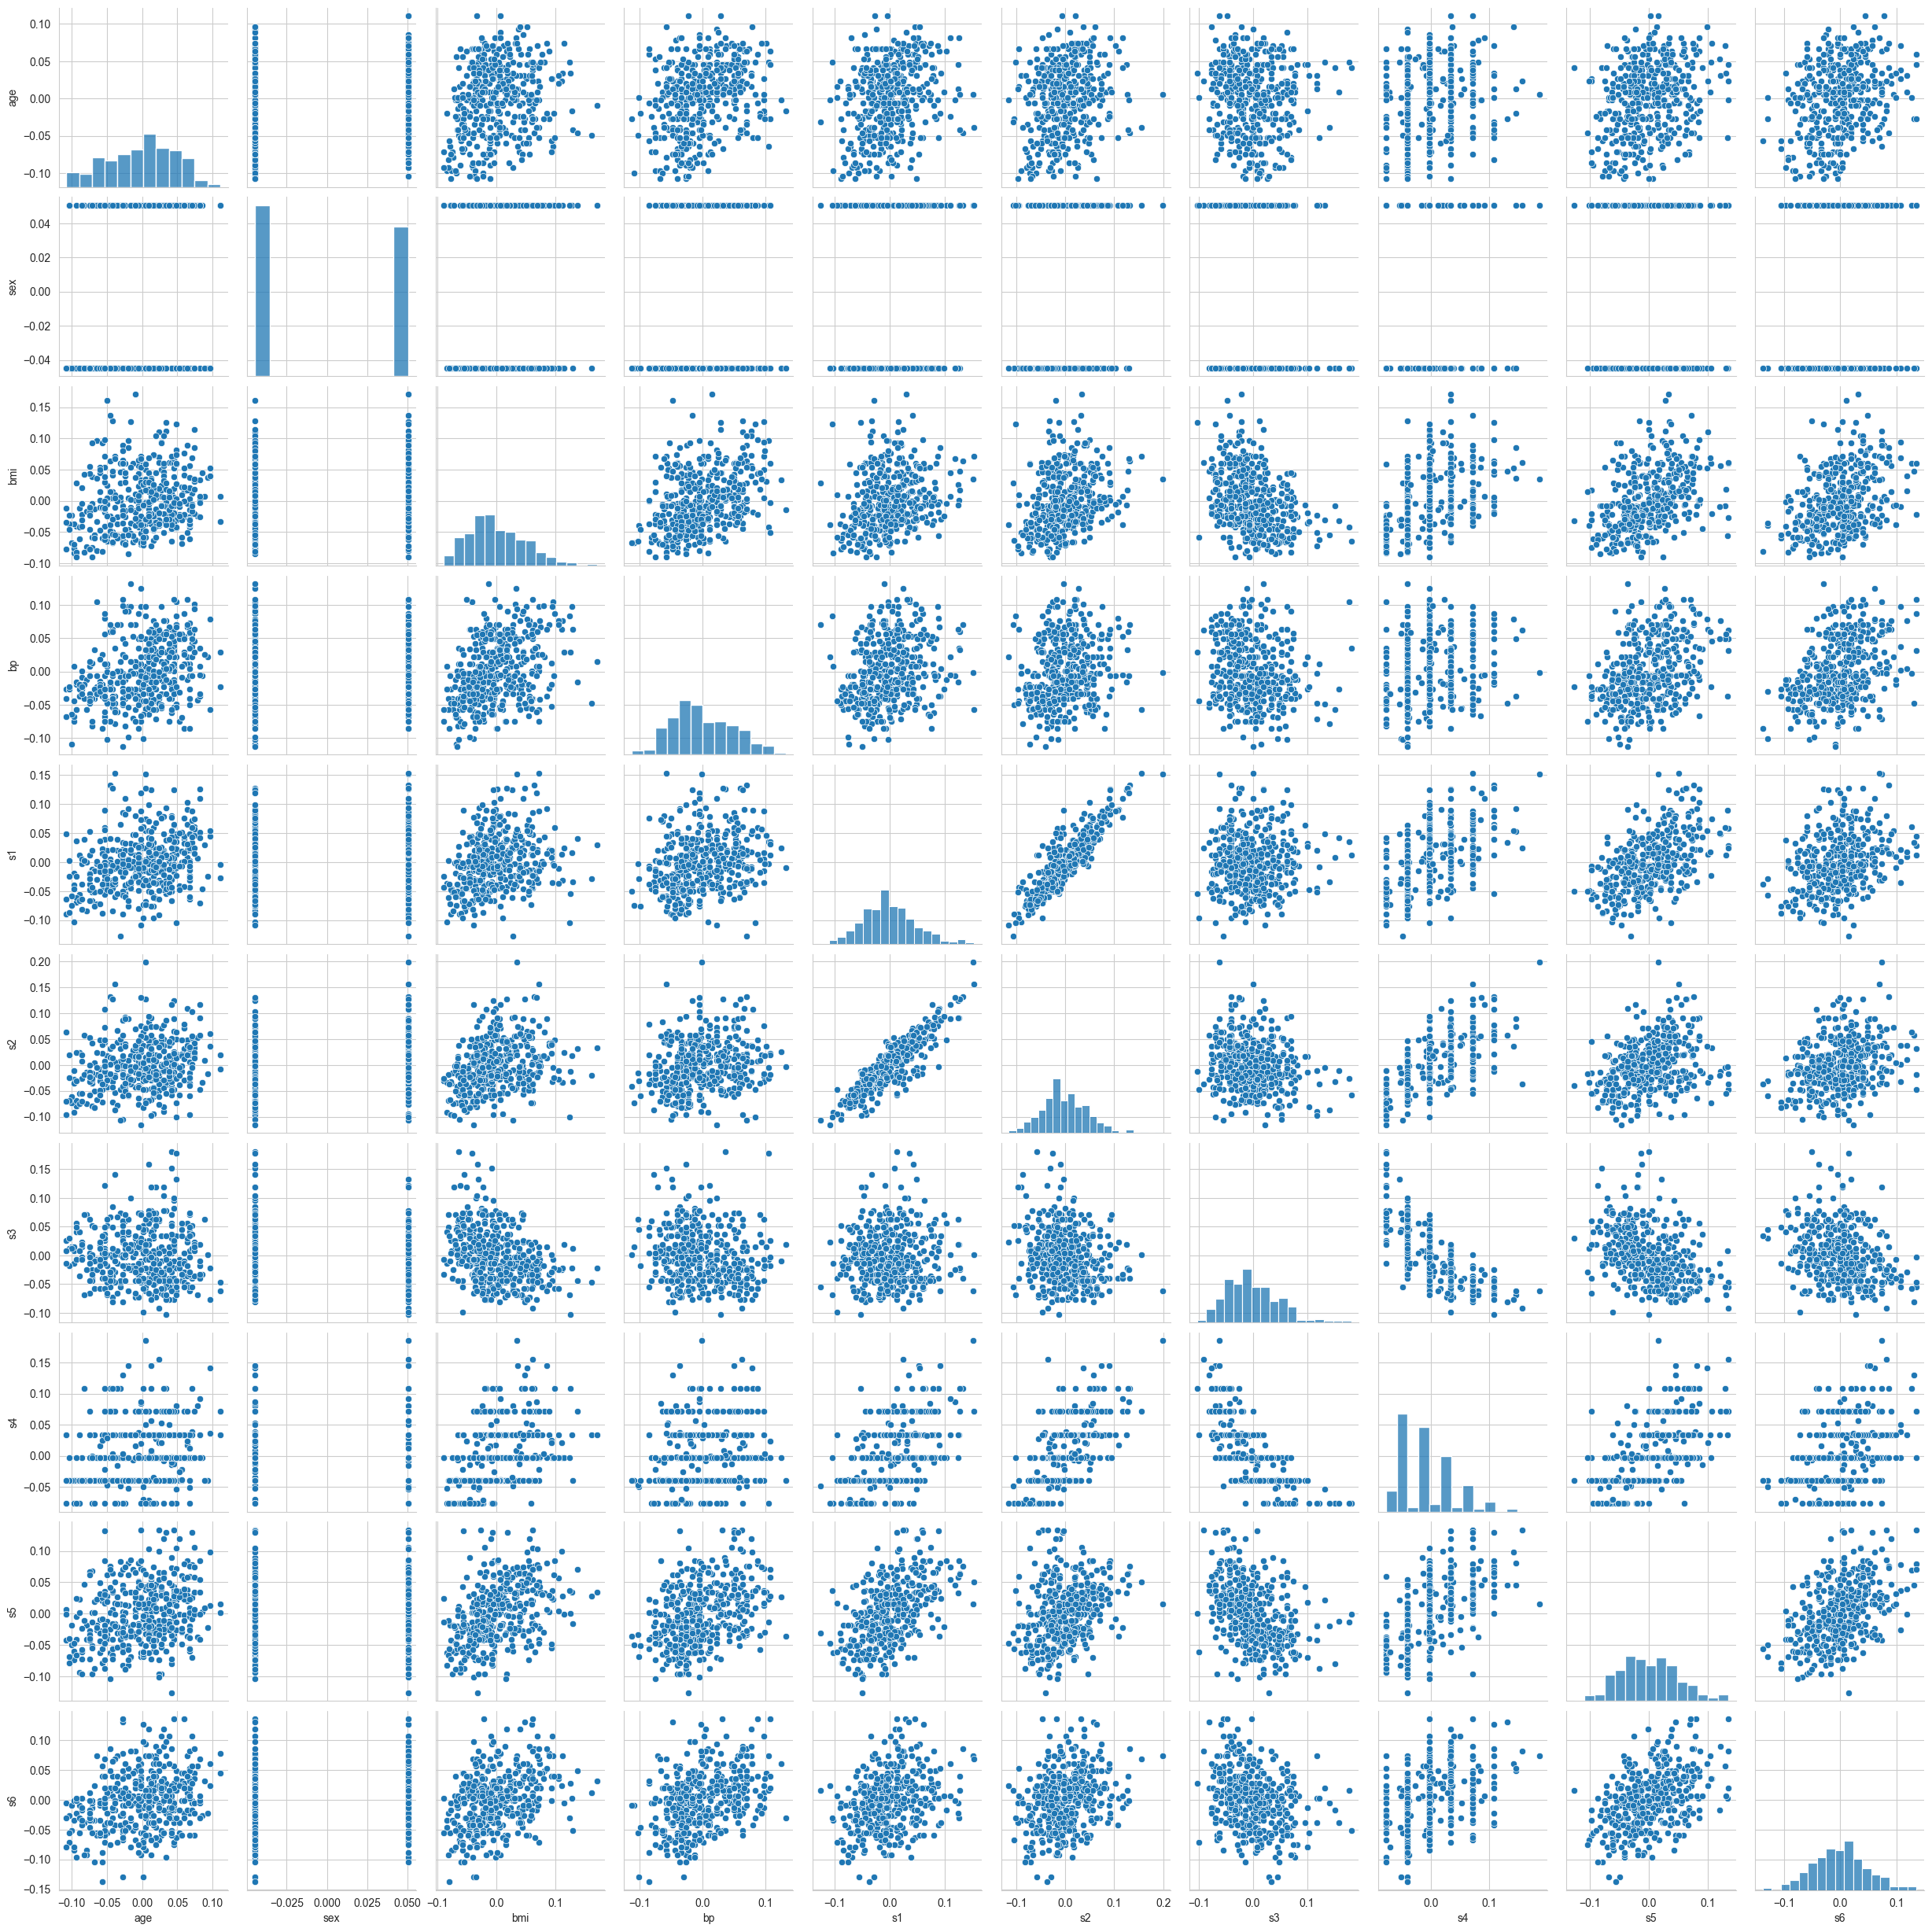

In [36]:
sns.pairplot(x_train);

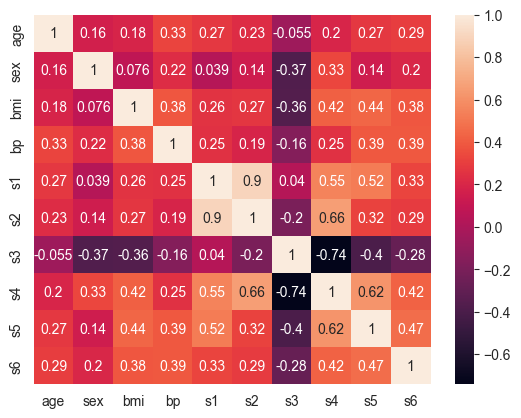

In [39]:
sns.heatmap(x_train.corr(numeric_only=True), annot=True);

**Vemos que la variable s3 tiene correlacion negativa con todas las demas**

**Vemos que la variable s2 y s1 tiene una correlacion muy alta**

**Vemos que la variable s2 y s4 tienen tambien una relacion bastante alta, aunque menor que la anterior**

Fit the training data and target to `diabetes_model`. Print the *intercept* and *coefficients* of the model.

In [42]:
diabetes_model.fit(x_train,y_train)

LinearRegression()

#### Inspecting the results

From the outputs you should have seen:

- The intercept is a float number.
- The coefficients are an array containing 10 float numbers.

This is the linear regression model fitted to your training dataset.

#### Using your fitted linear regression model, predict the *y* of `diabetes_data_test`.

In [43]:
print(diabetes_model.intercept_)

[152.76429169]


In [44]:
print(diabetes_model.coef_)

[[ 3.06094248e-01 -2.37635570e+02  5.10538048e+02  3.27729878e+02
  -8.14111926e+02  4.92799595e+02  1.02841240e+02  1.84603496e+02
   7.43509388e+02  7.60966464e+01]]


In [ ]:
# coeff_df = pd.DataFrame(diabetes_model.coef_,
#                         x.columns,
#                         columns=['Coefficient'])
# coeff_df

ValueError: Shape of passed values is (1, 10), indices imply (10, 1)

In [46]:
coeff_df = pd.DataFrame(diabetes_model.coef_.T, 
                        index=x.columns, 
                        columns=['Coefficient'])
coeff_df

,Coefficient
age,0.306094
sex,-237.635570
bmi,510.538048
bp,327.729878
s1,-814.111926
s2,492.799595
s3,102.841240
s4,184.603496
s5,743.509388
s6,76.096646


y = a + b*x1 + c*x2 + d*x3 + ....

#### Print your `diabetes_target_test` and compare with the prediction. 

In [48]:
x_test

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
422,-0.078165,0.050680,0.077863,0.052858,0.078236,0.064447,0.026550,-0.002592,0.040673,-0.009362
423,0.009016,0.050680,-0.039618,0.028758,0.038334,0.073529,-0.072854,0.108111,0.015568,-0.046641
424,0.001751,0.050680,0.011039,-0.019442,-0.016704,-0.003819,-0.047082,0.034309,0.024055,0.023775
425,-0.078165,-0.044642,-0.040696,-0.081413,-0.100638,-0.112795,0.022869,-0.076395,-0.020292,-0.050783
426,0.030811,0.050680,-0.034229,0.043666,0.057597,0.068831,-0.032356,0.057557,0.035459,0.085907
427,-0.034575,0.050680,0.005650,-0.005670,-0.073119,-0.062691,-0.006584,-0.039493,-0.045424,0.032059
428,0.048974,0.050680,0.088642,0.087287,0.035582,0.021546,-0.024993,0.034309,0.066051,0.131470
429,-0.041840,-0.044642,-0.033151,-0.022885,0.046589,0.041587,0.056003,-0.024733,-0.025953,-0.038357
430,-0.009147,-0.044642,-0.056863,-0.050427,0.021822,0.045345,-0.028674,0.034309,-0.009919,-0.017646
431,0.070769,0.050680,-0.030996,0.021872,-0.037344,-0.047034,0.033914,-0.039493,-0.014960,-0.001078


In [49]:
y_test

,0
422,233.0
423,91.0
424,111.0
425,152.0
426,120.0
427,67.0
428,310.0
429,94.0
430,183.0
431,66.0


#### Is `diabetes_target_test` exactly the same as the model prediction? Use different error metrics

In [50]:
prediccion = diabetes_model.predict(x_test)
prediccion

array([[197.61898486],
       [155.44031962],
       [172.88875144],
       [111.53270645],
       [164.79397301],
       [131.06765869],
       [259.12441219],
       [100.47873746],
       [117.06005372],
       [124.30261597],
       [218.36868146],
       [ 61.19581944],
       [132.24837933],
       [120.33293546],
       [ 52.54513009],
       [194.03746764],
       [102.5756431 ],
       [123.56778709],
       [211.03465323],
       [ 52.60221696]])

In [51]:
sns.scatterplot(x = y_test, y = prediccion);

ValueError: Per-column arrays must each be 1-dimensional

#### Iterate with a new model to assess if any improvements can be made compared to the previous one. Consider reducing the number of variables or using `StandardScaler` to enhance model performance.